## NAME - Likhit N
The idea is to predict the optimum number of clusters by using the k-means clustering method and represent it visually.

### Data Science and Buisness Analytics Task-2:
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
from sklearn import datasets

In [12]:
iris = pd.read_csv('../input/iris-data/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


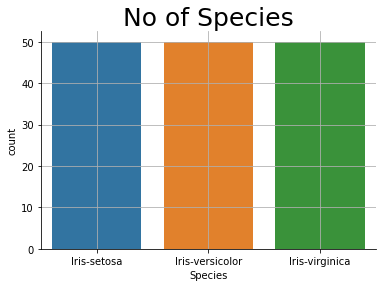

In [14]:
sns.countplot(x='Species',data=iris)
plt.title('No of Species',fontsize=25)
plt.grid()
sns.despine(top = True, right = True)

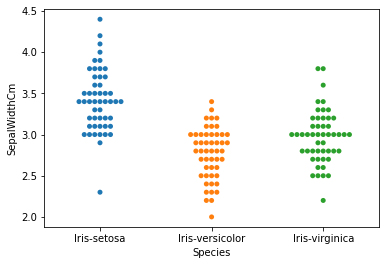

In [15]:
sns.swarmplot(x="Species", y="SepalWidthCm", data=iris)
plt.show()

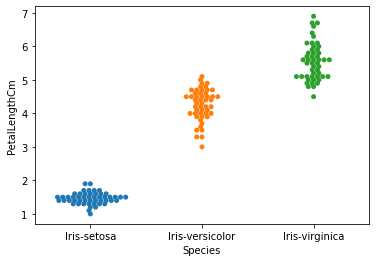

In [16]:
sns.swarmplot(x="Species", y="PetalLengthCm", data=iris)
plt.show()

## On visualizing the data, we already find the data points to be groups in some places, which implies that if we apply Cluster analysis, we can obtain a valid result of the data being clustered at some places.
K-means clustering is a method of vector quantization, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

In [17]:
from sklearn.cluster import KMeans

x = iris.iloc[:, [0, 1, 2, 3]].values

In [18]:
sum_of_squared_distance = []
K = range(1,10)
optimalK = 1
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(x)
  sum_of_squared_distance.append(km.inertia_)
  if k > 1:
    ratio = sum_of_squared_distance[k-1]/sum_of_squared_distance[k-2]
    if ratio < 0.55:
      optimalK = k

print("Optimal Number of Clusters = ",optimalK)

Optimal Number of Clusters =  3


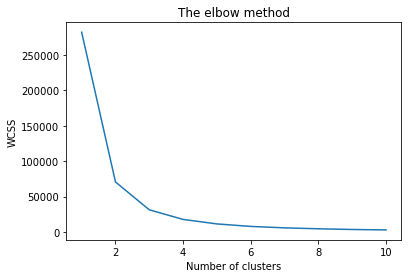

In [29]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## The most important information obtained is there is no null values in the data set. Note, the datatype of all feature the variables is float.

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '3'.

In [30]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

array([[125.        ,   6.57058824,   2.97058824,   5.52352941],
       [ 25.        ,   5.00612245,   3.42040816,   1.46530612],
       [ 74.5       ,   5.922     ,   2.78      ,   4.206     ]])

In [31]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

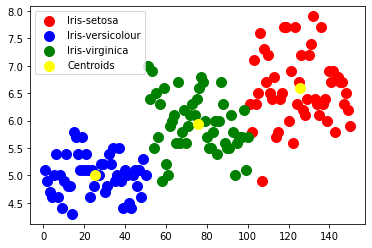

In [28]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## The Scatter Plot shows clearly the 3 clusters, represented by red for Setosa, blue for Versicolor and green for Virginica, including the centroids of each cluster represented in yellow.